# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Programação para Ciência de Dados</font>

## <font color="blue">Pandas Parte II - Exercícios</font>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

#### <font color="red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</font>

Os exercícios a seguir farão uso do arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> disponível para download no sistema _Moodle_. Este conjunto de dados fornece informações a respeito das escolas de ensino básico, fundamental e médio do estado de São Paulo. O significado de cada coluna pode ser encontrado no arquivo <font style="font-family: monaco">DicionarioESC.pdf</font> também disponível no moodle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Os comandos abaixo são apenas para modificar como as informações serão apresentadas
# no notebook

# mostra no máximo 50 colunas
pd.set_option('display.max_columns', 50)

# aumenta o tamanho das figuras geradas pelo matplotlib
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Exercício 1)
Carregue o arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> e armazene-o em uma variável DataFrame chamada `escolas`. Visualize as primeiras 5 linhas do DataFrame.

In [3]:
escolas = pd.read_csv('ESC2013_RMSP_CEM.csv')
print(escolas.head())

    ID  LONGITUDE  LATITUDE    CODESC  CODESCTX  \
0   90  -47143986 -23986886  35080548  35080548   
1  398  -47145545 -23985717  35352524  35352524   
2  399  -47145560 -23985685  35069929  35069929   
3  400  -47146239 -23983873  35036365  35036365   
4   97  -47141337 -23964408  35913424  35913424   

                                          NOMEESC    NOMEMUN   CODMUN  \
0       BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS  JUQUITIBA  3526209   
1  MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL  JUQUITIBA  3526209   
2                                   TERRA NOVA EM  JUQUITIBA  3526209   
3                             BAIRRO DOS BARNABES  JUQUITIBA  3526209   
4                          BAIRRO DAS SENHORINHAS  JUQUITIBA  3526209   

    NOMDIST      CODDIST  COD_SC  COD_DEP    TIP_DEP               BAIRRO  \
0  BARNABES  352620910.0     NaN        2   Estadual  BAIRRO DOS BARNABES   
1  BARNABES  352620910.0     NaN        3  Municipal             BARNABES   
2  BARNABES  352620910.

### Exercício 2)
O arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> possui muitos valores faltantes. Encontre e imprima o nome da coluna com mais valores faltantes. Calcule também o número de valores faltantes em tal coluna.

__DICA__: Utilize uma combinação dos métodos do <font color='blue'>pandas</font>:

[isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) que retorna uma máscara com True nas posições onde valores faltantes ocorrem<br>
[idxmax](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) retorna o rótulo onde o valor máximo que ocorre em um dado eixo (rótulo da linha ou coluna dependento do valor do parâmetro `axis`)<br> 
[max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html) que retorna o valor máximo em um eixo especificado

In [12]:
faltantes = escolas.isna().sum(axis=0)
print(f'Coluna {faltantes.idxmax()} com {faltantes.max()} dados faltantes')


Coluna COD_SC com 10937 dados faltantes


### Exercício 3)
Verifique se existem linhas duplicadas no conjunto de dados

__Dica:__ Utilize o método <font color='blue'>duplicated</font> do <font color='blue'>pandas</font>

In [15]:
print(f'Total de linhas duplicadas: {escolas.duplicated().sum(axis=0)}')


Total de linhas duplicadas: 0


### Exercício 4)
A coluna 'COD_DEP' do DataFrame `escolas` representa o código da dependência administrativa da escola (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada).

Calcule quantas escolas federais, estaduais, municipais e particulares existem na base de dados. Armazene a contagem em uma série cujos rótulos são o tipo de dependência e os valores correspondentes o número de ocorrências da dependência administrativa.

**DICA**: Utilize o método <font color='blue'>value_counts</font> do <font color='blue'>pandas</font>

In [20]:
cont = escolas['COD_DEP'].value_counts().rename({1:'Federal',2:'Estadual',3:'Municipal',4:'Privada'})

### Exercício 5) 
O Pandas também oferece recursos para visualização que são simples de utilizar. Utilize o método <font color='blue'>plot</font> do <font color='blue'>pandas</font> com o parâmetro `bar` para gerar um gráfico de barras com o número de escolas calculadas na célula acima. Para mais informações sobre os recursos gráficos disponíveis no pandas veja documentação [aqui](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).

<AxesSubplot:>

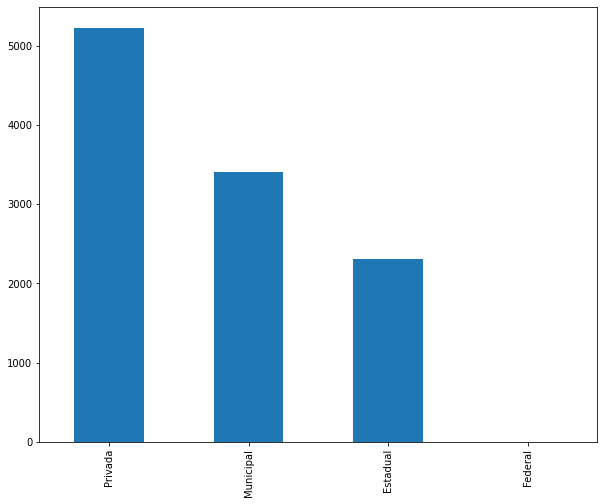

In [22]:
cont.plot(kind='bar')

### Exercício 6)
Como visto anteriormente, o conjunto de dados do arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> possui muitos valores faltantes. Utilize uma combinação do método <font color='blue'>map</font> e <font color='blue'>isna</font> para encontrar a porcentagem de linhas do DataFrame que possuem dados faltantes.

In [26]:
faltantes_por_linha = escolas.isna().sum(axis=1)
linha_com_valores_faltantes = faltantes_por_linha.map(lambda x: x>0)
print("Porcentagem de linhas com dados faltantes: ",100*linha_com_valores_faltantes.sum()/linha_com_valores_faltantes.shape[0])

Porcentagem de linhas com dados faltantes:  100.0


### Exercício 7)

O resultado do exercício anterior mostra que todas as linhas do conjunto de dados <font style="font-family: monaco">ESC2013_RMSP_CEM.csv</font> possuem pelo menos um dado faltante. Assim, se adotarmos a estratégia de remover as linhas que possuem dados faltantes, todo o conjunto de dados será descartado. 

Uma alternativa é remover do conjunto de dados as colunas onde o número de valores faltantes é elevado. Escreva um código que gere um novo DataFrame chamado `escolas30` contendo as colunas do DataFrame `escolas` com no máximo 30% de valores faltantes. 

__Dica:__ Gere uma série booleana onde os rótulos das linhas são os rótulos das colunas do DataFrame `escolas`, sendo os valores 'True' nas entradas correspondendo às colunas
com menos que 30% de valores faltantes. Utilize a série booleana em conjunto com o comando <font color='blue'>loc</font> do <font color='blue'>pandas</font> para extrair as colunas desejadas.

In [32]:
# calcula o número de valores faltantes em cada coluna
nulos_por_coluna = escolas.isna().sum(axis=0)
nulos_por_coluna

ID              0
LONGITUDE       0
LATITUDE        0
CODESC          0
CODESCTX        0
             ... 
CH_EN13      9803
CN_EN13      9803
ENEM2013     9803
INSE_AB      6404
INSE_CL      6404
Length: 136, dtype: int64

In [30]:
len(escolas)

10937

In [34]:
# gera uma série booleana com valores True correspondendo as colunas do DataFrame 'escolas' com menos que 30% de valores faltantes
colunas_maximo30_nulos = nulos_por_coluna < 0.3*len(escolas)

In [37]:
# obtendo as colunas do DataFrame 'escolas' com menos que 30% de valores faltantes
escolas30 = escolas.loc[:,colunas_maximo30_nulos.values]
print(escolas30.shape)
print(escolas30.head())


(10937, 47)
    ID  LONGITUDE  LATITUDE    CODESC  CODESCTX  \
0   90  -47143986 -23986886  35080548  35080548   
1  398  -47145545 -23985717  35352524  35352524   
2  399  -47145560 -23985685  35069929  35069929   
3  400  -47146239 -23983873  35036365  35036365   
4   97  -47141337 -23964408  35913424  35913424   

                                          NOMEESC    NOMEMUN   CODMUN  \
0       BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS  JUQUITIBA  3526209   
1  MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL  JUQUITIBA  3526209   
2                                   TERRA NOVA EM  JUQUITIBA  3526209   
3                             BAIRRO DOS BARNABES  JUQUITIBA  3526209   
4                          BAIRRO DAS SENHORINHAS  JUQUITIBA  3526209   

    NOMDIST      CODDIST  COD_DEP    TIP_DEP               BAIRRO        CEP  \
0  BARNABES  352620910.0        2   Estadual  BAIRRO DOS BARNABES  6950000.0   
1  BARNABES  352620910.0        3  Municipal             BARNABES  6950000.0   
2 

### Exercício 8)

Quantas colunas restaram no DataFrame `escolas30`? Recalcule a porcentagem de linhas com pelo menos um valor faltante.

In [38]:
print("Numero de colunas restantes: ",escolas30.shape[1])

linhas_com_valores_faltantes_escolas30 = escolas30.isna().sum(axis=1).map(lambda x: x>0)

perc_nulos = 100*linhas_com_valores_faltantes_escolas30.sum()/linhas_com_valores_faltantes_escolas30.shape[0]

print(f'{perc_nulos:.2f}% de linhas com valores faltantes')

Numero de colunas restantes:  47
10.07% de linhas com valores faltantes


### Exercício 9)

O DataFrame `escolas30` possui poucos valores faltantes. Preencha os valores faltantes com o valor da _moda_  da coluna onde o valor faltante ocorre. 

__Dica:__ Utilize o método <font color='blue'>mode</font> combinado com <font color='blue'>fillna</font> do <font color='blue'>pandas</font>. Note que o método  <font color='blue'>mode</font> pode retornar vários valores caso haja um empate no cálculo da moda. Escolha o primeiro dentre os valores retornados como o valor da moda.

In [40]:
# Obtendo as modas
modas = escolas30.mode() # calcula o valor da moda em cada coluna
                         # o resultado é um DataFrame onde a primeira linha
                         # contém os valores da moda da coluna, a segunda linha
                         # valores de moda onde houve impate e NaN caso não ocorra 
                         # impate, e assim por diante
print(modas.head())

escolas30 = escolas30.fillna(modas.iloc[0])  # preenchendo os valores faltantes com um dos
                                             # valores da moda em cada coluna.

   ID   LONGITUDE    LATITUDE    CODESC  CODESCTX             NOMEESC  \
0   1 -46735695.0 -23663271.0  35000012  35000012       FENIX COLEGIO   
1   3 -46593982.0 -23530345.0  35000024  35000024  INTEGRACAO COLEGIO   
2   4 -46556889.0 -23514886.0  35000036  35000036                 NaN   
3   5         NaN         NaN  35000048  35000048                 NaN   
4   6         NaN         NaN  35000059  35000059                 NaN   

     NOMEMUN     CODMUN    NOMDIST      CODDIST  COD_DEP  TIP_DEP  BAIRRO  \
0  SAO PAULO  3550308.0  GUARULHOS  351880005.0      4.0  Privada  CENTRO   
1        NaN        NaN        NaN          NaN      NaN      NaN     NaN   
2        NaN        NaN        NaN          NaN      NaN      NaN     NaN   
3        NaN        NaN        NaN          NaN      NaN      NaN     NaN   
4        NaN        NaN        NaN          NaN      NaN      NaN     NaN   

         CEP     END_ESC NUM_ESC  DDD TELEFONE  LOCALIZA  LAB_INF  QD_ESP_C  \
0  7700000.0  R SAO

### Exercício 10)

Certifique que o DataFrame `escolas30` não possui qualquer valor faltante após o tratamento realizado no exercício anterior.

In [41]:
# Verificando que não restam valores faltantes
# note que o resultado é um DataFrame vazio "Empty DataFrame"
#print(escolas30.loc[escolas30.isna().sum(axis=1) > 0])

# solucao alternativa

print('Numero de valores faltante =',escolas30.isna().sum(axis=0).sum())

Numero de valores faltante = 0
